# Réalisez une étude de santé publique avec R ou Python

## Question 1 : la proportion de personnes en état de sous-nutrition

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
# importer le fichier sous_nutrition.csv
df_sousNutrition = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P4/sous_nutrition.csv')
print(df_sousNutrition.head()) # voir les 5 premières lignes

          Zone      Année Valeur
0  Afghanistan  2012-2014    8.6
1  Afghanistan  2013-2015    8.8
2  Afghanistan  2014-2016    8.9
3  Afghanistan  2015-2017    9.7
4  Afghanistan  2016-2018   10.5


In [242]:
# Voir les statistiques de chaque colonne du tableau
df_sousNutrition.describe()

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Dominique,2012-2014,<0.1
freq,6,203,120


In [243]:
# connaitre le typage de chaque variable du tableau
df_sousNutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [244]:
# voir le nombre de valeur manquante de chaque colonne du tableau
df_sousNutrition.isna().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

In [304]:
# nombre des personnes en etat de sous-nutrition en 2017 (moyenne des années 2016 - 2018)
sousNutrition_2017 = df_sousNutrition.loc[df_sousNutrition['Année'] == '2016-2018']
sousNutrition_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2016-2018,10.5
10,Afrique du Sud,2016-2018,3.1
16,Albanie,2016-2018,0.1
22,Algérie,2016-2018,1.3
28,Allemagne,2016-2018,NaN


In [247]:
# Mise en forme du tableau
sousNutrition_2017["Valeur"].replace("<0.1", 0.1) # remplacer la valeur "<0.1" par "0.1"
sousNutrition_2017.fillna(0, inplace=True) # Remplacer les valeurs manquantes par 0


# convertir la valeur totale en numerique
sousNutrition_mondiale_2017 = round((pd.to_numeric(sousNutrition_2017['Valeur'],errors = 'coerce')).sum()*1000000,2)
print(sousNutrition_mondiale_2017, "personnes en sous-nutrition dans le monde")

535700000.0 personnes en sous-nutrition dans le monde


In [248]:
# importer le fichier population.csv
df_population = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P4/population.csv')
df_population.columns = ['Zone', 'Année', 'Population en milliers habitants']
df_population.head() # voir les 5 premières lignes

,Zone,Année,Population en milliers habitants
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [249]:
# Voir les statistiques de chaque colonne du tableau
df_population.describe()

,Année,Population en milliers habitants
count,1416.000000,1.416000e+03
mean,2015.500000,3.144793e+04
std,1.708428,1.300812e+05
min,2013.000000,7.930000e-01
25%,2014.000000,3.783410e+02
50%,2015.500000,5.126480e+03
75%,2017.000000,1.930666e+04
max,2018.000000,1.427648e+06


In [250]:
# connaitre le typage de chaque variable du tableau
df_population.dtypes

Zone                                 object
Année                                 int64
Population en milliers habitants    float64
dtype: object

In [251]:
# voir le nombre de valeur manquante de chaque colonne du tableau
df_population.isna().sum()

Zone                                0
Année                               0
Population en milliers habitants    0
dtype: int64

In [252]:
# calcul de la population mondiale en 2017 en millier d'habitants
population_2017 = df_population.loc[df_population['Année'] == 2017]
population_mondiale = round((population_2017['Population en milliers habitants'].sum())*1000,2)
print(population_mondiale, "d'habitants dans le monde")

7548134111.0 d'habitants dans le monde


In [253]:
# calcul de la proportion de personnes en sous-nutrition dans le monde en 2017
proportion_SousNutrition_2017 = round(sousNutrition_mondiale_2017/population_mondiale*100,2)
print(proportion_SousNutrition_2017, "% de personnes en état de sous-nutrition dans le monde")

7.1 % de personnes en état de sous-nutrition dans le monde


#### En 2017 nous avons 535,7 millions d'habitants en état de sous nutrition, ce qui représente 7,1% de la population mondiale

## Question 2 : le nombre théorique de personnes qui pourraient être nourries

In [254]:
# importer le fichier dispo_alimentaire.csv
df_dispoAlimentaire = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P4/dispo_alimentaire.csv')
df_dispoAlimentaire.head() # voir les 5 premières lignes

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [255]:
# Voir les statistiques de chaque colonne du tableau
df_dispoAlimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [256]:
# connaitre le typage de chaque variable du tableau
df_dispoAlimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [257]:
# voir le nombre de valeur manquante de chaque colonne du tableau
df_dispoAlimentaire.isna().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [258]:
# Remplacer les valeurs manquantes par un nombre
df_dispoAlimentaire.fillna(0, inplace=True)
df_dispoAlimentaire.head() # voir les 5 premières lignes

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [259]:
# voir le nombre de valeur manquante de chaque colonne du tableau
df_dispoAlimentaire.isna().sum()

Zone                                                             0
Produit                                                          0
Origine                                                          0
Aliments pour animaux                                            0
Autres Utilisations                                              0
Disponibilité alimentaire (Kcal/personne/jour)                   0
Disponibilité alimentaire en quantité (kg/personne/an)           0
Disponibilité de matière grasse en quantité (g/personne/jour)    0
Disponibilité de protéines en quantité (g/personne/jour)         0
Disponibilité intérieure                                         0
Exportations - Quantité                                          0
Importations - Quantité                                          0
Nourriture                                                       0
Pertes                                                           0
Production                                                    

In [264]:
# calcul de la disponibilté alimentaire (Kcal/personne/jour) par pays
dispo_alimentaire_pays = pd.DataFrame(df_dispoAlimentaire.groupby(['Zone']).sum()["Disponibilité alimentaire (Kcal/personne/jour)"])
dispo_alimentaire_pays.columns = ['Dispo alimentaire Kcal/personne/jour']
print(dispo_alimentaire_pays.head())

                Dispo alimentaire Kcal/personne/jour
Zone                                                
Afghanistan                                   2087.0
Afrique du Sud                                3020.0
Albanie                                       3188.0
Algérie                                       3293.0
Allemagne                                     3503.0


In [265]:
# merger le tableau disponibilité_Alimentaire et la population par pays pour l'année 2017
df_dispo_alimentaire_mondiale = pd.merge(dispo_alimentaire_pays,population_2017,on='Zone')
df_dispo_alimentaire_mondiale.head()

,Zone,Dispo alimentaire Kcal/personne/jour,Année,Population en milliers habitants
0,Afghanistan,2087.0,2017,36296.113
1,Afrique du Sud,3020.0,2017,57009.756
2,Albanie,3188.0,2017,2884.169
3,Algérie,3293.0,2017,41389.189
4,Allemagne,3503.0,2017,82658.409


In [266]:
# calcul de la disponibilité alimentaire mondiale pour l'année 2017
df_dispo_alimentaire_mondiale["dispo_totale"] = (df_dispo_alimentaire_mondiale["Dispo alimentaire Kcal/personne/jour"]*
                                                 df_dispo_alimentaire_mondiale["Population en milliers habitants"])*365*1000

dispo_mondiale = df_dispo_alimentaire_mondiale["dispo_totale"].sum()
print(dispo_mondiale, "Kcal")

7635429388975815.0 Kcal


In [267]:
# le nombre théorique de personnes qui pourraient être nourries en 2017
## avec 2500 Kcal/personne/jour
nbre_Personne_Nourries = round(dispo_mondiale/(2500*365),2)
print (nbre_Personne_Nourries, "pourrons etres nourries en 2017")
print(round(nbre_Personne_Nourries/(population_mondiale)*100,2), "% de la population mondiale pourront etre nourries")

8367593850.93 pourrons etres nourries en 2017
110.86 % de la population mondiale pourront etre nourries


#### SI on part sur l'hypothése que les besoins alimentaires d'un individu sont évalués à 2500 Kcal/jour, 8,36 milliards de personnes pourront etre nourries en 2017. Ce qui représente 110,86% de la population mondiale.

## Question 3 : le nombre théorique de personnes qui pourraient être nourries avec des produits vegetaux

In [268]:
# disponibilité alimentaire d'origine vegetale
dispoAlimentaire_OrigineVegetale = df_dispoAlimentaire.loc[df_dispoAlimentaire['Origine'] == 'vegetale']
dispoAlimentaire_OrigineVegetale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0


In [269]:
# disponibilté alimentaire d'oringine vegetale (Kcal/personne/jour) par pays
dispoAlimentaire_OrigineVegetale_pays = pd.DataFrame(dispoAlimentaire_OrigineVegetale.groupby(['Zone']).sum()["Disponibilité alimentaire (Kcal/personne/jour)"])
dispoAlimentaire_OrigineVegetale_pays.head()

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,1871.0
Afrique du Sud,2533.0
Albanie,2203.0
Algérie,2915.0
Allemagne,2461.0


In [270]:
# merger le tableau disponibilité_Alimentaire d'origine vegetale et la population par pays pour l'année 2017
dispoAlimentaire_OrigineVegetale_mondiale = pd.merge(dispoAlimentaire_OrigineVegetale_pays,population_2017,on='Zone')
dispoAlimentaire_OrigineVegetale_mondiale

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population en milliers habitants
0,Afghanistan,1871.0,2017,36296.113
1,Afrique du Sud,2533.0,2017,57009.756
2,Albanie,2203.0,2017,2884.169
3,Algérie,2915.0,2017,41389.189
4,Allemagne,2461.0,2017,82658.409
...,...,...,...,...
167,Émirats arabes unis,2718.0,2017,9487.203
168,Équateur,1732.0,2017,16785.361
169,États-Unis d'Amérique,2698.0,2017,325084.756
170,Éthiopie,2005.0,2017,106399.924


In [271]:
# calcul de la disponibilité alimentaire mondial pour l'année 2017
dispoAlimentaire_OrigineVegetale_mondiale["dispo_totale"] = (dispoAlimentaire_OrigineVegetale_mondiale["Disponibilité alimentaire (Kcal/personne/jour)"]*dispoAlimentaire_OrigineVegetale_mondiale["Population en milliers habitants"])*365*1000
dispo_OrigineVegetale_mondiale = dispoAlimentaire_OrigineVegetale_mondiale["dispo_totale"].sum()
print(dispo_OrigineVegetale_mondiale, 'Kcal')

6300178937197865.0 Kcal


In [272]:
# le nombre théorique de personnes qui pourraient être nourries en 2017 avec les produits végétaux
## avec 2500 Kcal/personne/jour
nbre_Personne_Nourries = round(dispo_OrigineVegetale_mondiale/(2500*365),2)
print(nbre_Personne_Nourries, "pourrons etres nourries avec des produits vegetaux" )
print(round(nbre_Personne_Nourries/population_mondiale*100,2), "% de la population mondiale pourront etre nourries par la disponibilité des produits végétaux")

6904305684.6 pourrons etres nourries avec des produits vegetaux
91.47 % de la population mondiale pourront etre nourries par la disponibilité des produits végétaux


#### Comme pour la question2, on est parti sur l'hypothése de 2500Kcal/personne/jour. Dans ce cas nous pouvons nourrir 6,9 milliards de personnes en 2017 avec des produits végétaux, ce qui représente 91,47% de la population mondiale.

## Question 4 : L’utilisation de la disponibilité intérieure

In [273]:
# Calcul de la disponibilté interieure globale
## Disponibilité_Interieure = Production + Importation - Exportation + Variation_stock
df_dispoAlimentaire['disponibilite_interieure'] = (df_dispoAlimentaire['Production'] + df_dispoAlimentaire['Importations - Quantité'] 
                                                   - df_dispoAlimentaire['Exportations - Quantité'] + df_dispoAlimentaire['Variation de stock'])
disponibilite_interieure_globale = df_dispoAlimentaire['disponibilite_interieure'].sum()
disponibilite_interieure_globale

9849173.0

In [274]:
# Utilisation de la disponibilité interieure
## Disponibilité_Interieure = Aliment_Animaux + Nourriture + Pertes + Semences + Traitement + Autres_utililsation
## Part animale
utilisation_animale = round(df_dispoAlimentaire['Aliments pour animaux'].sum()/disponibilite_interieure_globale*100,2)
print (utilisation_animale, "% alimentation Animale")

## Part alimentation humaine
utilisation_humaine = round((df_dispoAlimentaire['Nourriture'].sum()/disponibilite_interieure_globale)*100,2)
print (utilisation_humaine, "% Nourriture")

## Pertes
Pertes = round((df_dispoAlimentaire['Pertes'].sum()/disponibilite_interieure_globale)*100,2)
print (Pertes, "% de perte")

## Semences
Semences = round((df_dispoAlimentaire['Semences'].sum()/disponibilite_interieure_globale)*100,2)
print (Semences, "% de semence")

## Traitement
Traitement = round((df_dispoAlimentaire['Traitement'].sum()/disponibilite_interieure_globale)*100,2)
print (Traitement, "% tranformation alimentaire ")

## autres utilisation
Autres = round((df_dispoAlimentaire['Autres Utilisations'].sum()/disponibilite_interieure_globale)*100,2)
print (Autres, "% Autre Utilisation ")

13.24 % alimentation Animale
49.51 % Nourriture
4.61 % de perte
1.57 % de semence
22.38 % tranformation alimentaire 
8.78 % Autre Utilisation 


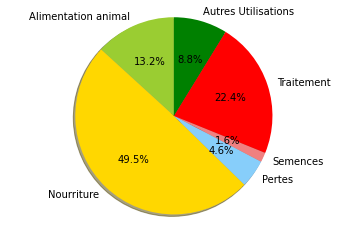

In [275]:
Utilisation_dispo_interieur = [utilisation_animale,utilisation_humaine,Pertes,Semences,Traitement,Autres]
labels = 'Alimentation animal', 'Nourriture', 'Pertes', 'Semences', 'Traitement', 'Autres Utilisations'
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'green']

plt.pie(Utilisation_dispo_interieur, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

## Question 5 : Utilisation des céréales dans la repartition de la disponibilité alimentaire

In [281]:
# importer le fichier sous_nutrition.csv
cereales = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P4/cereales.csv')
cereales.head() # voir les 5 premières lignes

,Code Domaine,Domaine,Code zone (FAO),Zone,Code ?l?ment,?l?ment,Code Produit,Produit,Code ann?e,Ann?e,Unit?,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5521,Aliments pour animaux,2511,Bl? et produits,2017,2017,Milliers de tonnes,491,Im,Donn?es de la FAO bas?es sur une m?thodologie ...
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5142,Nourriture,2511,Bl? et produits,2017,2017,Milliers de tonnes,5749,Im,Donn?es de la FAO bas?es sur une m?thodologie ...
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5521,Aliments pour animaux,2807,Riz et produits,2017,2017,Milliers de tonnes,0,Im,Donn?es de la FAO bas?es sur une m?thodologie ...
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5142,Nourriture,2807,Riz et produits,2017,2017,Milliers de tonnes,646,Im,Donn?es de la FAO bas?es sur une m?thodologie ...
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5521,Aliments pour animaux,2513,Orge et produits,2017,2017,Milliers de tonnes,67,Im,Donn?es de la FAO bas?es sur une m?thodologie ...


In [282]:
## la liste des produits
cereales['Produit'].unique()

array(['Bl? et produits', 'Riz et produits', 'Orge et produits',
       'Ma?s et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'C?r?ales, Autres'],
      dtype=object)

In [283]:
## calcule des quantités en fonction de la liste des céréales et par pays
liste_cereale = ['Blé et produits', 'Céréales, Autres', 'Maïs et produits', 'Millet et produits', 'Orge et produits', 'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits']
df_cereale = df_dispoAlimentaire[df_dispoAlimentaire["Produit"].isin(liste_cereale)].groupby("Zone").sum().reset_index()
df_cereale.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,disponibilite_interieure
0,Afghanistan,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afrique du Sud,16.0,0.0,6.0,0.82,0.09,0.18,61.0,14.0,28.0,44.0,1.0,47.0,1.0,0.0,0.0,61.0
2,Albanie,25.0,0.0,1.0,0.21,0.01,0.04,28.0,0.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,28.0
3,Algérie,109.0,0.0,0.0,0.04,0.00,0.01,126.0,0.0,12.0,1.0,6.0,113.0,8.0,0.0,0.0,125.0
4,Allemagne,3025.0,228.0,18.0,2.22,0.24,0.61,3596.0,448.0,621.0,183.0,72.0,3318.0,88.0,0.0,105.0,3596.0


In [285]:
## calcul de l'utilisation des céréales dans la repartition de la disponibilité alimentaire
proportion_liste = [round(df_cereale["Aliments pour animaux"].sum()/df_cereale["Disponibilité intérieure"].sum()*100,2), 
                    round(df_cereale["Nourriture"].sum()/df_cereale["Disponibilité intérieure"].sum()*100,2)]
proportion_liste.append(round(100 - proportion_liste[0] - proportion_liste[1],2))
proportion_liste

[69.34, 18.13, 12.53]

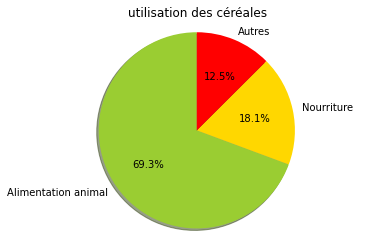

In [286]:
labels = 'Alimentation animal', 'Nourriture', 'Autres'
colors = ['yellowgreen', 'gold', 'red']

plt.pie(proportion_liste, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('utilisation des céréales')
plt.show()

In [287]:
## calcule des quantités en fonction de la liste des céréales et par pays
liste_cereale = ['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle']
df_cereale = df_dispoAlimentaire[df_dispoAlimentaire["Produit"].isin(liste_cereale)].groupby("Zone").sum().reset_index()
df_cereale.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,disponibilite_interieure
0,Afghanistan,560.0,0.0,1560.0,179.87,5.52,41.04,7303.0,0.0,1303.0,5494.0,883.0,6350.0,363.0,0.0,-350.0,7303.0
1,Afrique du Sud,4824.0,0.0,1538.0,180.02,10.20,41.09,15493.0,3777.0,3147.0,9503.0,500.0,14155.0,73.0,593.0,1969.0,15494.0
2,Albanie,411.0,134.0,1144.0,149.27,6.08,35.49,1145.0,4.0,468.0,474.0,91.0,703.0,22.0,12.0,-22.0,1145.0
3,Algérie,4337.0,820.0,1678.0,217.67,6.79,49.33,15013.0,2.0,10279.0,8535.0,1024.0,4914.0,253.0,42.0,-180.0,15011.0
4,Allemagne,26615.0,1013.0,872.0,111.11,3.48,26.39,42158.0,16721.0,11093.0,9191.0,1221.0,47757.0,1027.0,3090.0,28.0,42157.0


In [288]:
## calcul de l'utilisation des céréales dans la repartition de la disponibilité alimentaire
proportion_liste = [round(df_cereale["Aliments pour animaux"].sum()/df_cereale["disponibilite_interieure"].sum()*100,2), 
                    round(df_cereale["Nourriture"].sum()/df_cereale["disponibilite_interieure"].sum()*100,2)]
proportion_liste.append(100 - proportion_liste[0] - proportion_liste[1])
proportion_liste

[36.29, 42.75, 20.96]

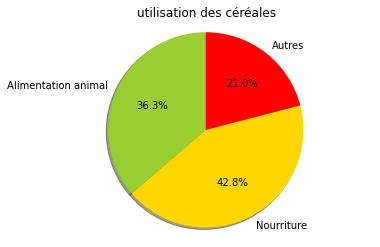

In [289]:
labels = 'Alimentation animal', 'Nourriture', 'Autres'
colors = ['yellowgreen', 'gold', 'red']

plt.pie(proportion_liste, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.title('utilisation des céréales')
plt.show()

## Question 6 : Utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition

In [290]:
## calcule des quantités en fonction de la liste des céréales et par pays
liste= ['Manioc']
df_Manioc_pays = df_dispoAlimentaire[df_dispoAlimentaire["Produit"].isin(liste)].groupby("Zone").sum().reset_index()
df_Manioc_pays.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,disponibilite_interieure
0,Afrique du Sud,0.0,57.0,0.0,0.0,0.0,0.00,57.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,1.0,57.0
1,Albanie,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Algérie,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Allemagne,1.0,26.0,0.0,0.0,0.0,0.00,27.0,14.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
4,Angola,8880.0,0.0,560.0,197.9,0.6,4.72,16412.0,0.0,0.0,4249.0,3282.0,16412.0,0.0,0.0,0.0,16412.0


In [291]:
# disponibilité alimentaire d'origine vegetale
df_manioc_thailande = df_Manioc_pays.loc[df_Manioc_pays['Zone'] == 'Thaïlande']
df_manioc_thailande

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,disponibilite_interieure
148,Thaïlande,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,0.0,0.0,0.0,6264.0


In [292]:
# la proportion de l'exportation du manioc par rapport à la production
Proportion_manioc = round(df_manioc_thailande['Exportations - Quantité']/df_manioc_thailande['Production']*100,2).sum()
print (Proportion_manioc, '% de la production du manioc est exportée')

83.41 % de la production du manioc est exportée


In [293]:
# nombre des personnes en etat de sous-nutrition en Thailande en 2017 (moyenne des années 2016 - 2018)
sousNutrition_2017_Thailande = sousNutrition_2017.loc[sousNutrition_2017['Zone'] == 'Thaïlande']
sousNutrition_2017_Thailande = (pd.to_numeric(sousNutrition_2017_Thailande['Valeur'],errors = 'coerce')).sum()*1000000

# la population total de la Thailande en 2017 en millier d'habitants
population_2017_Thailande = population_2017.loc[population_2017['Zone'] == 'Thaïlande']
population_2017_Thailande = (pd.to_numeric(population_2017_Thailande['Population en milliers habitants'],errors = 'coerce')).sum()*1000

# la proportion de sous-alimentés en Thailande
Proportion_sousalimentés_Thailande = round((sousNutrition_2017_Thailande/population_2017_Thailande)*100,2)
print(Proportion_sousalimentés_Thailande, "% de la population Thailandaise est en etat de sous-nutrition")

8.96 % de la population Thailandaise est en etat de sous-nutrition


#### On remarque qu'enThailande, plus de 83% de la production du manioc est exportée alors que 8,96% de la population est en sous alimentation

## Question 7 : les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [296]:
# Nombre de sous-alimentés par pays
SousAlimentation_2017_Pays = pd.merge(sousNutrition_2017, population_2017, on='Zone')
SousAlimentation_2017_Pays = pd.DataFrame(SousAlimentation_2017_Pays, columns = ['Zone', 'Valeur', 'Population en milliers habitants'])

# calcul de la proportion de sous alimentation pour chaque pays
SousAlimentation_2017_Pays['Proportion (%)'] = round((((pd.to_numeric(SousAlimentation_2017_Pays['Valeur'],
                                                        errors = 'coerce'))*1000)/SousAlimentation_2017_Pays['Population en milliers habitants'])*100,2)

# classement des pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 
classement_SousAlimentation_2017 = pd.DataFrame(SousAlimentation_2017_Pays, columns = ['Zone', 'Proportion (%)'])
classement_SousAlimentation_2017 = classement_SousAlimentation_2017.sort_values(by = ['Proportion (%)'], ascending = False)
classement_SousAlimentation_2017.head(10)

,Zone,Proportion (%)
78,Haïti,48.26
157,République populaire démocratique de Corée,47.19
108,Madagascar,41.06
103,Libéria,38.28
100,Lesotho,38.25
183,Tchad,37.96
161,Rwanda,35.06
121,Mozambique,32.81
186,Timor-Leste,32.17
0,Afghanistan,28.93


## Question 8 : Les pays qui ont le plus bénéficié d’aide alimentaire depuis 2013


In [297]:
# Importer le fichier aide alimentaire
aide_alimentaire = pd.read_csv('C:/Users/p092279/Desktop/Documents/Data Analyst/P4/aide_alimentaire.csv')
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [298]:
# Voir les statistiques de chaque colonne du tableau
aide_alimentaire.describe()

,Année,Valeur
count,1475.000000,1475.000000
mean,2014.054237,7481.966780
std,0.946916,23339.531424
min,2013.000000,0.000000
25%,2013.000000,287.500000
50%,2014.000000,1178.000000
75%,2015.000000,4334.500000
max,2016.000000,265013.000000


In [299]:
# voir le nombre de valeur manquante de chaque colonne du tableau
aide_alimentaire.isna().sum()

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

In [300]:
# connaitre le typage de chaque variable du tableau
aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [301]:
# calcul de l'aide total par pays
aide_alimentaire_pays = pd.DataFrame(aide_alimentaire.groupby(['Pays bénéficiaire']).sum()["Valeur"]).reset_index()
aide_alimentaire_pays.columns = ['Pays bénéficiaire', 'Quantité aide alimentaire']

# classement des pays qui ont recu plus d'aides alimentaires depuis 2013
classement_aide_alimentaire = aide_alimentaire_pays.sort_values(by = ['Quantité aide alimentaire'], ascending = False)
classement_aide_alimentaire.head(10)

,Pays bénéficiaire,Quantité aide alimentaire
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


## Question 9 : les pays ayant le plus de disponibilité/habitant

In [302]:
# calcul de la disponibilté alimentaire (Kcal/personne/jour) par pays
dispo_alimentaire_pays = pd.DataFrame(df_dispoAlimentaire.groupby(['Zone']).sum()["Disponibilité alimentaire (Kcal/personne/jour)"]).reset_index()

# classement des pays ayant le plus de disponibilité/habitant
classement_dispo_alimentaire_pays = dispo_alimentaire_pays.sort_values(by = ['Disponibilité alimentaire (Kcal/personne/jour)'], ascending = False)
classement_dispo_alimentaire_pays.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


## Question 10 : les pays ayant le moins de disponibilité/habitant

In [303]:
# classement des pays ayant le plus de disponibilité/habitant
classement_dispo_alimentaire_pays = dispo_alimentaire_pays.sort_values(by = ['Disponibilité alimentaire (Kcal/personne/jour)'], ascending = True)
classement_dispo_alimentaire_pays.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0
